In [3]:
from vnstock import *
from function import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


##### VN100

In [1]:
import requests

url = "https://www.hsx.vn/Modules/Listed/Web/StockIndex/188803177?_search=false&nd=1676169121809&rows=2147483647&page=1&sidx=id&sord=desc"

payload={}
headers = {
  'Accept': 'application/json, text/javascript, */*; q=0.01',
  'Accept-Language': 'en-US,en;q=0.9',
  'Connection': 'keep-alive',
  'Cookie': 'ASP.NET_SessionId=pv5aylwinwlvuoxvulhw1520; TS016df111=01343ddb6a732d11705aa16e6e99545c4235ff00bd07f7414bbc3a74d35868c1b58d4d36d60f85294e5c2c0db6f52781f5f778f0760b8aa544f0c272e536799b269ccfe30c; TS0d710d04027=085cef26a9ab2000b2c8a3c680e48f06c29eb8c9070f02b7a50cb2e04312e353b8eb7c255dd5353608174c63a611300074005a71c9eb2a42d1ac3507bed71e1a6aa3bb449c5f75e1e51cbffcd3da2a4a7903957b541b1a138abd510fc6f9d8f6; TS0d710d04027=085cef26a9ab20006d24140c1a5e12ef3aaf09d94d0ad3fef504082ec7d0bafa3060dd87135e6e1208289d1fd7113000e733bb8f855b5e33367dc2862e425f27981f58be49c7f724ac2bd6205b1f6297d9223c5766bbd7a41a3b7008f8647f21',
  'Referer': 'https://www.hsx.vn/Modules/Listed/Web/StockIndexView/188803177',
  'Sec-Fetch-Dest': 'empty',
  'Sec-Fetch-Mode': 'cors',
  'Sec-Fetch-Site': 'same-origin',
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36 Edg/110.0.1587.41',
  'X-KL-Ajax-Request': 'Ajax_Request',
  'X-Requested-With': 'XMLHttpRequest',
  'sec-ch-ua': '"Chromium";v="110", "Not A(Brand";v="24", "Microsoft Edge";v="110"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': '"Windows"'
}

response = requests.request("GET", url, headers=headers, data=payload)
a = response.json()
ticket=[]
# VN 100
for i in range(100):
    ticket.append(a["rows"][i]["cell"][2][:3])

##### VN30

In [17]:
ticket = ['CII','CTD','CTG','DHG','DPM','EIB','FPT','GAS','GMD','HDB','HPG','MBB','MSN','MWG','NVL','PNJ','REE','ROS','SAB','SBT','SSI','STB','TCB','VCB','VHM','VIC','VJC','VNM','VPB','VRE']

frame = []
for i in ticket:
    a = stock_historical_data(symbol=i, 
                            start_date="2013-01-01", 
                            end_date='2023-02-11')    
    a["ticker"] = i
    frame.append(a)
    
q = pd.concat(frame)
close= q.pivot_table(values="Close", columns="ticker", index="TradingDate")
high= q.pivot_table(values="High", columns="ticker", index="TradingDate")
low= q.pivot_table(values="Low", columns="ticker", index="TradingDate")
open= q.pivot_table(values="Open", columns="ticker", index="TradingDate")


### Markowitz model

In [5]:
w = marko_weights(close)
returns=close.pct_change()

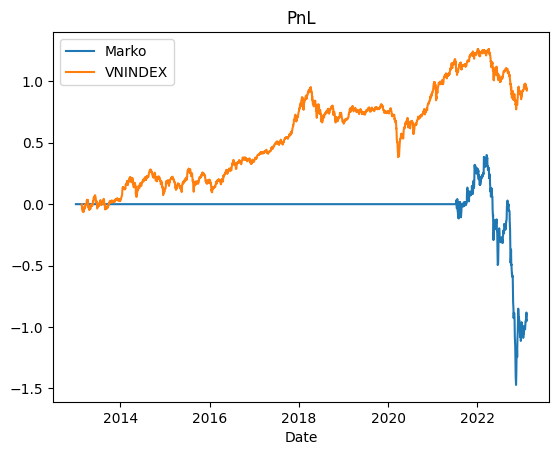

In [6]:
a = Simresult(w,returns=returns)
a.plot_pnl("Marko")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

### alpha = ts_delta(close,5)

In [7]:
lag = 5
close_t5=close-close.shift(lag)

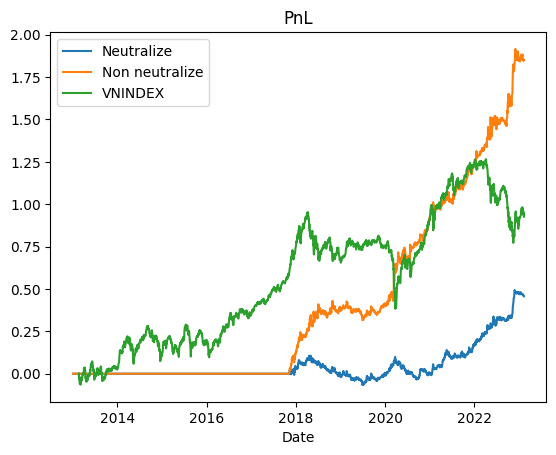

In [8]:
returns = close.pct_change()
w  = weights(close_t5, neutrali=1)
neu=Simresult(weights=w,returns=returns)
neu.plot_pnl(type="Neutralize")

w1  = weights(close_t5, neutrali=0)
non_neu=Simresult(weights=w1,returns=returns)
non_neu.plot_pnl(type="Non neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [10]:
neu.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.045669,0.683437,0.326305,0.25568,0.139957


In [9]:
neu.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,0.000000,NaN,0.000000,NaN,NaN
2014,0.000000,NaN,0.000000,NaN,NaN
2015,0.000000,NaN,0.000000,NaN,NaN
2016,0.000000,NaN,0.000000,NaN,NaN
2017,0.040716,0.666807,0.084878,0.461833,479.699099
2018,-0.058122,-0.654457,0.602068,-0.203344,-96.537877
2019,0.020845,0.263357,0.642856,0.047423,32.425887
2020,-0.002284,-0.027131,0.572198,-0.001714,-3.991452
2021,0.163667,1.924500,0.557456,1.042781,293.596471


In [11]:
non_neu.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.185065,1.328434,0.339995,0.98009,0.544317


In [81]:
non_neu.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.200281,-1.301853,0.633236,-0.732148,-316.281692
2014,0.113767,0.667203,0.611300,0.287832,186.106555
2015,0.022115,0.144314,0.596954,0.027776,37.045744
2016,0.402133,2.803389,0.548013,2.401446,733.802306
2017,0.576685,4.164778,0.518273,4.393209,1112.705227
2018,0.327371,1.617240,0.582216,1.212698,562.285211
2019,0.123876,1.150296,0.625107,0.512067,198.168110
2020,0.420794,2.003896,0.587899,1.695347,715.758765
2021,0.209164,1.278138,0.609508,0.748742,343.169468


### alpha = rank(ts_delta(close,5))

In [12]:
lag = 5
close_t5=close-close.shift(lag)
alpha2 = (close_t5.rank(axis=1,ascending=True))
w =weights(alpha2)
w1 =weights(alpha2,neutrali=1)

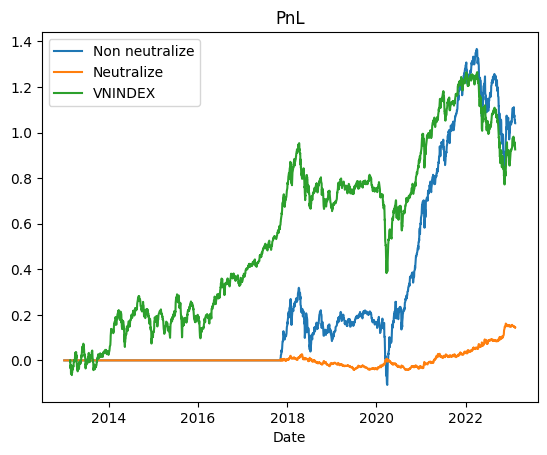

In [13]:
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [82]:
a.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,0.097369,0.649807,0.292286,0.375051,333.128168
2014,0.132952,0.804325,0.298899,0.536434,444.804796
2015,0.163126,1.090661,0.286465,0.823030,569.444803
2016,0.377523,2.724458,0.281287,3.156293,1342.129211
2017,0.559970,5.101108,0.257363,7.524429,2175.795357
2018,-0.119771,-0.520215,0.267524,-0.348078,-447.699849
2019,0.034172,0.326177,0.279527,0.114045,122.248643
2020,0.225970,0.983369,0.281627,0.880856,802.374576
2021,0.524897,2.464990,0.278822,3.382120,1882.554538


In [91]:
b.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.085402,-2.273450,0.292286,-1.228899,-292.187329
2014,-0.046229,-1.220652,0.298840,-0.480098,-154.694780
2015,-0.020374,-0.526252,0.286465,-0.140346,-71.123765
2016,0.061601,1.719326,0.281207,0.804708,219.058194
2017,0.095194,2.816622,0.257273,1.713313,370.012373
2018,-0.025029,-0.601305,0.267456,-0.183946,-93.581759
2019,0.013281,0.503809,0.279527,0.109816,47.512035
2020,-0.011161,-0.292264,0.281627,-0.058181,-39.629535
2021,0.035685,0.818678,0.278822,0.292881,127.983913


### alpha = rank(ts_stddev(close,20)/(ts_sum(close,20)/20))

In [14]:
alpha3 = close.rolling(20).std()/close.rolling(20).mean()
alpha3 = alpha3.rank(ascending=True)

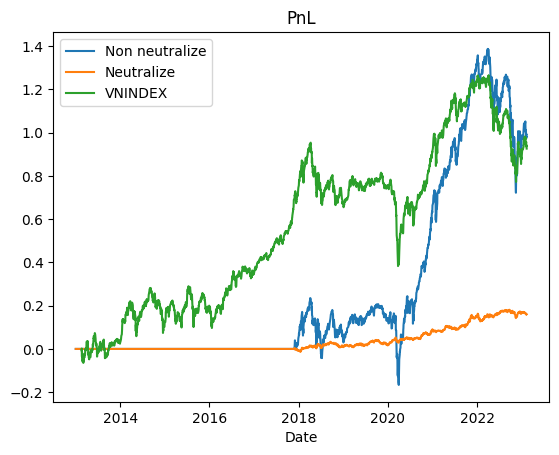

In [15]:
w =weights(alpha3, neutrali=0)
w1 =weights(alpha3,neutrali=1)

a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [72]:
a.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,0.155355,0.919214,0.073334,1.337912,2118.468429
2014,0.223178,1.197458,0.076556,2.044543,2915.225896
2015,0.267160,1.608591,0.074116,3.054040,3604.606530
2016,0.367719,2.443170,0.075794,5.381396,4851.572938
2017,0.451496,3.548146,0.073467,8.795910,6145.521295
2018,-0.048975,-0.203811,0.055862,-0.190836,-876.724435
2019,0.007682,0.066985,0.089992,0.019571,85.363494
2020,0.299631,1.209310,0.064245,2.611623,4663.865363
2021,0.558155,2.459815,0.061143,7.432033,9128.727359


### alpha = close-ts_min(low,14))/(ts_max(high,14)-ts_min(low,14))*100

In [95]:
alpha4 = (close-low.rolling(14).min())/(high.rolling(14).max()-low.rolling(14).min())*100
alpha4 = alpha4.rank(ascending=True)

In [105]:
class Simresult():
    def __init__(self,weights,returns):
        self.weights = weights
        self.returns = returns
        self.ret = np.sum(self.weights*self.returns.shift(-1),axis=1)

    def get_pnl(self):
        i=np.cumsum(self.ret)
        return i

    def get_return(self):
        return self.ret.groupby(self.ret.index.year).agg(np.mean)*252

    def get_sharpe(self):
        i = self.ret
        return self.get_return()/(i.groupby(i.index.year).agg(np.std)*np.sqrt(252))
        
    def get_turnover(self):
        weights_t = self.weights
        weights_t1 = self.weights.shift(1)
        turnover = np.sum(np.abs(weights_t - weights_t1),axis=1).groupby(self.weights.index.year).agg(np.mean)
        return turnover    

    def get_fitness(self):
        fitness = self.get_sharpe()*np.sqrt(np.abs(self.get_return()/self.get_turnover()))
        return fitness

    def get_margin(self):
        margin = self.get_return()*1000/self.get_turnover()
        return margin
    
    def get_summary(self):
        return pd.DataFrame({'Return': self.get_return().values, 
                             'Sharpe': self.get_sharpe().values, 
                            'Turnover': self.get_turnover().values,
                            "Fitness": self.get_fitness().values,
                            "Margin": self.get_margin().values
                            }, index=self.get_return().index)    
    
    def get_overall(self):
        r = np.mean(self.ret)*252
        s = r/(np.std(self.ret)*np.sqrt(252))
        t = np.mean(self.get_turnover())
        f = s*np.sqrt(np.abs(r/t))
        m = r/t
        return pd.DataFrame({'Return': [r], 
                             'Sharpe': [s], 
                            'Turnover': [t],
                            "Fitness": [f],
                            "Margin": [m],
                            })
        
    def plot_pnl(self,type=""):
        plt.plot(self.get_pnl(), label=type)
        plt.xlabel("Date")
        plt.title("PnL")
        plt.legend()

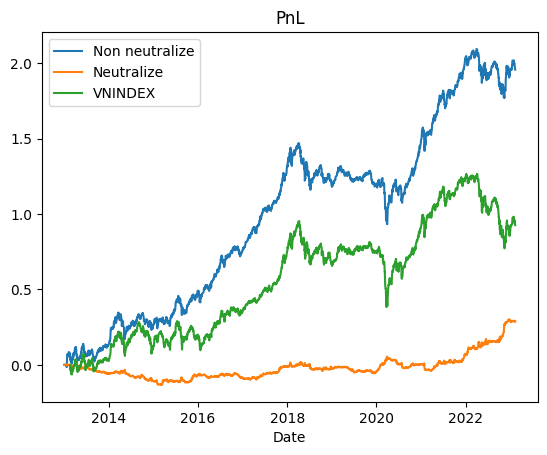

In [106]:
w =weights(alpha4, neutrali=0)
w1 =weights(alpha4,neutrali=1)

a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [101]:
a.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,0.134800,0.929515,0.243635,0.691404,553.287040
2014,0.130479,0.806783,0.270298,0.560538,482.721276
2015,0.228955,1.502832,0.256498,1.419854,892.619985
2016,0.274902,2.026603,0.253992,2.108371,1082.322793
2017,0.551111,4.878474,0.217562,7.764463,2533.115121
2018,-0.108607,-0.490544,0.252768,-0.321549,-429.672378
2019,0.002594,0.025533,0.261779,0.002542,9.909889
2020,0.286828,1.324185,0.224728,1.495997,1276.333215
2021,0.556215,2.629299,0.226820,4.117373,2452.225482


In [98]:
b.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.057189,-1.485596,0.244418,-0.718602,-233.978377
2014,-0.052211,-1.166815,0.271063,-0.512094,-192.617448
2015,0.042051,0.950984,0.257206,0.384523,163.492753
2016,-0.020567,-0.569416,0.254038,-0.162019,-80.960071
2017,0.079143,2.199969,0.217547,1.326925,363.797071
2018,-0.016580,-0.277503,0.252724,-0.071078,-65.604691
2019,-0.018963,-0.608078,0.261939,-0.163609,-72.392962
2020,0.050019,0.930743,0.224960,0.438878,222.345058
2021,0.060301,1.018890,0.227087,0.525042,265.542225
